In [7]:
import numpy as np



def gradStep(x, grad, stepSize):
    return x - stepSize*grad(x)


# in general
def descAlgs(x, step, direction):
    return x - step * direction

def NewtonStep(x, grad, Hessian, stepSize):
    return x - stepSize * np.linalg.inv(Hessian(x)) @ grad(x)

In [2]:
steps = 10000
stepSize = 0.01
x0 = np.array([100,50])

def f(x):
    return 100*x[0]**2+x[1]**2

def gradF(x):
    return np.array([200*x[0], 2*x[1]])

def HessianF(x):
    return np.array([[200, 0], [0, 2]])
x = x0
for i in range(steps):
    x = gradStep(x, gradF, stepSize)

print(x)
stepSize = 0.1
x = x0
for i in range(steps):
    x = NewtonStep(x, gradF, HessianF, stepSize)

print(x)

[1.00000000e+02 9.11437576e-87]
[2.e-323 2.e-323]


$f(x) = (a-x_1)^2 + b(x_2-x_1^2)^2

$\nabla f(x) = \begin{pmatrix}-2(a-x_1) - 4x_1b(x_2-x_1^2) \\ 2b(x_2 - x_1^2)\end{pmatrix}$

$\nabla^2 f(x) = \begin{pmatrix} -2 -(4b(x_2-x_1^2) + 8bx_1^2) && -4bx_1 \\
-4bx_1 && 2b \end{pmatrix}$

In [9]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# initial definition of function and gradients

def Rosenbrock(x, a=1, b=100):
    return (a-x[0])**2+b*(x[1]-x[0]**2)**2

def RosenbrockFast(x, y, a=1, b=100):
    return Rosenbrock(np.array([x,y]), a, b)


def RosenbrockGrad(x, a=1, b=100):
    return np.array([-2*(a-x[0])- 4*x[0]*b*(x[1]-x[0]**2), 2*b*(x[1]-x[0]**2)])

def RosenbrockFastGrad(x, y, a=1, b=100):
    return RosenbrockGrad(np.array([x,y]), a, b)

def RosenbrockHessian(x, a=1, b=100):
    return np.array([[-2 -(4*b*(x[1]-x[0]**2)+8*b*x[0]), -4*b*x[0]], [-4*b*x[0], 2*b]])

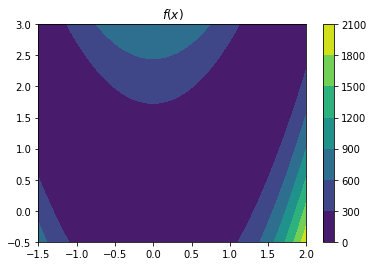

In [23]:
# Countour plot of fA(x)
x = np.linspace(-1.5, 2, 1000)
y = np.linspace(-0.5, 3, 1000)
X, Y = np.meshgrid(x, y)
Z = RosenbrockFast(X,Y)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('$f(x)$')
plt.show()

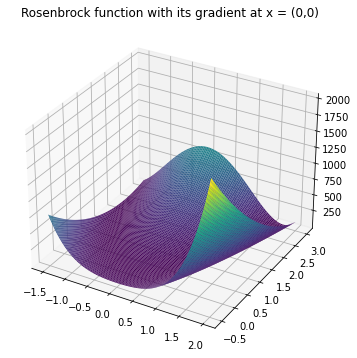

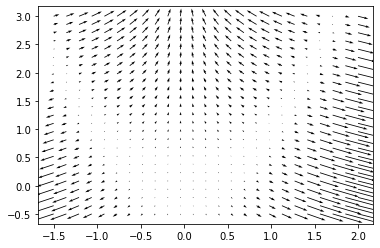

In [35]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


x1 = np.linspace(-1.5, 2, 100)
x2 = np.linspace(-0.5, 3, 100)
X, Y = np.meshgrid(x1,x2)
Z = RosenbrockFast(X,Y)


ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Rosenbrock function with its gradient at x = (0,0)')
plt.show()
x1 = np.linspace(-1.5, 2, 25)
x2 = np.linspace(-0.5, 3, 25)
XGrad, YGrad = np.meshgrid(x1,x2)
grads = RosenbrockFastGrad(XGrad,YGrad)
plt.quiver(XGrad, YGrad, grads[0,:,:], grads[1,:,:])
plt.show()

In [31]:
numPoints = 10

X,Y = np.meshgrid(np.linspace(-1.5, -2, numPoints), np.linspace(-0.5, -3,numPoints))
stepSizes = [0.05, 0.01, 0.005,0.001, 0.0005, 0.0001]


for stepSize in stepSizes:
    for x0 in ((np.random.uniform(-1.5, 2),np.random.uniform(-0.5, 3)) for x in range(numPoints)):
        x = np.ones((150001, 2))
        x[0] = x0
        for i in range(150000):
            #print(x[i])
            i = i+1
            x[i] = gradStep(x[i-1], RosenbrockGrad, stepSize)
            if np.linalg.norm(RosenbrockGrad(x[i])) < 0.001:
                break
        print(f"We got from {x[0]} to {x[i]} in {i} steps and decreased the value from {Rosenbrock(x[0])} to {Rosenbrock(x[i])} while using stepsize {stepSize}")

C:\Users\st3ph\AppData\Local\Temp\ipykernel_13760\33691328.py:11: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-2*(a-x[0])- 4*x[0]*b*(x[1]-x[0]**2), 2*b*(x[1]-x[0]**2)])
C:\Users\st3ph\AppData\Local\Temp\ipykernel_13760\297531330.py:6: RuntimeWarning: invalid value encountered in subtract
  return x - stepSize*grad(x)


We got from [ 0.73337027 -0.20840074] to [nan nan] in 150000 steps and decreased the value from 55.75741408278262 to nan while using stepsize 0.05
We got from [0.23798032 2.21403842] to [nan nan] in 150000 steps and decreased the value from 466.0197849545277 to nan while using stepsize 0.05


C:\Users\st3ph\AppData\Local\Temp\ipykernel_13760\33691328.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([-2*(a-x[0])- 4*x[0]*b*(x[1]-x[0]**2), 2*b*(x[1]-x[0]**2)])


We got from [0.87825673 0.52474321] to [nan nan] in 150000 steps and decreased the value from 6.095566883618347 to nan while using stepsize 0.05
We got from [-0.08164109  1.9084571 ] to [nan nan] in 150000 steps and decreased the value from 362.8511633456596 to nan while using stepsize 0.05
We got from [-0.23843235  0.63806969] to [nan nan] in 150000 steps and decreased the value from 35.31534934628396 to nan while using stepsize 0.05
We got from [-0.22273236  2.51722874] to [nan nan] in 150000 steps and decreased the value from 610.4094443636292 to nan while using stepsize 0.05
We got from [-0.60464547 -0.34382487] to [nan nan] in 150000 steps and decreased the value from 52.90270457348842 to nan while using stepsize 0.05
We got from [1.30612768 2.00207889] to [nan nan] in 150000 steps and decreased the value from 8.8617895567762 to nan while using stepsize 0.05
We got from [0.5458225  2.96560875] to [nan nan] in 150000 steps and decreased the value from 711.861428266566 to nan while 

In [25]:
numPoints = 10

#X,Y = np.meshgrid(np.linspace(-1.5, -2, numPoints), np.linspace(-0.5, -3,numPoints))
stepSizes = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]


for stepSize in stepSizes:
    for x0 in ((np.random.uniform(-1.5, 2),np.random.uniform(-0.5, 3)) for x in range(numPoints)):
        x = np.ones((150001, 2))
        x[0] = x0
        for i in range(150000):

            i = i+1
            x[i] = NewtonStep(x[i-1], RosenbrockGrad, RosenbrockHessian, stepSize)
            if np.linalg.norm(RosenbrockGrad(x[i])) < 0.001:
                break
        print(f"We got from {x[0]} to {x[i]} in {i} steps and decreased the value from {Rosenbrock(x[0])} to {Rosenbrock(x[i])} while using stepsize {stepSize}")

C:\Users\st3ph\AppData\Local\Temp\ipykernel_13760\33691328.py:11: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-2*(a-x[0])- 4*x[0]*b*(x[1]-x[0]**2), 2*b*(x[1]-x[0]**2)])
C:\Users\st3ph\AppData\Local\Temp\ipykernel_13760\33691328.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([-2*(a-x[0])- 4*x[0]*b*(x[1]-x[0]**2), 2*b*(x[1]-x[0]**2)])


We got from [-1.02811352 -0.43693779] to [nan nan] in 150000 steps and decreased the value from 227.30345968123973 to nan while using stepsize 0.5
We got from [0.4093987  1.42534858] to [nan nan] in 150000 steps and decreased the value from 158.54012398514976 to nan while using stepsize 0.5
We got from [1.60297722 1.15541999] to [nan nan] in 150000 steps and decreased the value from 200.33598474466197 to nan while using stepsize 0.5
We got from [-1.05306635  2.76140464] to [nan nan] in 150000 steps and decreased the value from 277.27612943556227 to nan while using stepsize 0.5


KeyboardInterrupt: 

In [27]:
import numpy as np
x = np.ones((150001, 2))
x[0] = [0,2]
stepSize = 0.001
for i in range(150000):
    print(x[i])
    i = i+1
    x[i] = gradStep(x[i-1], RosenbrockGrad, stepSize)
    if np.linalg.norm(RosenbrockGrad(x[i])) < 0.001:
        break
print("finished", x[i], i)

[0. 2.]
[0.002 1.6  ]
[0.005276  1.2800008]
[0.0099667  1.02400621]
[0.01602875 0.81922483]
[0.02324751 0.65543125]
[0.03129085 0.52445309]
[0.03978024 0.4197583 ]
[0.04835474 0.33612313]
[0.05671406 0.26936614]
[0.0646384  0.21613621]
[0.07198938 0.17374459]
[0.07869927 0.14003217]
[0.08475507 0.11326445]
[0.09018193 0.09204824]
[0.09502863 0.07526515]
[0.09935625 0.06201821]
[0.10322997 0.0515889 ]
[0.10671369 0.0434024 ]
[0.10986682 0.03699949]
[0.11274262 0.03201373]
[0.11538764 0.02815317]
[0.11784175 0.02518539]
[0.12013865 0.02292565]
[0.12230648 0.02122718]
[0.12436853 0.01997352]
[0.12634395 0.01907232]
[0.12824841 0.01845042]
[0.13009466 0.01804986]
[0.13189302 0.01782482]
[0.13365187 0.01773901]
[0.13537795 0.01776377]
[0.13707668 0.01787645]
[0.13875244 0.01805917]
[0.14040872 0.01829778]
[0.14204833 0.01858115]
[0.14367351 0.01890046]
[0.14528608 0.01924879]
[0.14688745 0.01962064]
[0.1484788  0.02001169]
[0.15006102 0.02041855]
[0.15163486 0.0208385 ]
[0.15320091 0.021269